# Explore here

In [5]:
import os
import seaborn as sns
import pandas as pd
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#SETTING ENVIRONMENT VARIABLES
load_dotenv()
client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

In [6]:
#INITIALIZE SPOTIPY LIBRARY
con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

In [7]:
#API REQUESTS
artist_id = "7G1GBhoKtEPnP86X2PvEYO" #Nina Simone

client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

response = sp.artist_top_tracks("7G1GBhoKtEPnP86X2PvEYO")
if response:
  tracks = response["tracks"]
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

In [8]:
#TRANSFORMING THE DATA FRAME
tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

print(tracks_df.head(10))

   duration_ms                                               name  popularity
9     4.578000  Sinnerman - Felix Da Housecat's Heavenly House...          53
6    10.366667                                          Sinnerman          61
7     3.877200                      Sinnerman - Sofi Tukker Remix          61
8     4.647767                                          Baltimore          61
5     2.513150                  Feeling Good - Austin Millz Remix          62
4     3.143550         I Wish I Knew How It Would Feel to Be Free          63
3     2.770000                      Don't Let Me Be Misunderstood          64
2     3.595767        My Baby Just Cares for Me (2013 - Remaster)          68
1     2.583767                               I Put A Spell On You          70
0     2.900000                                       Feeling Good          75


/tmp/ipykernel_5073/4282036675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='popularity', y='name', data=tracks_df.head(10),palette=colors)


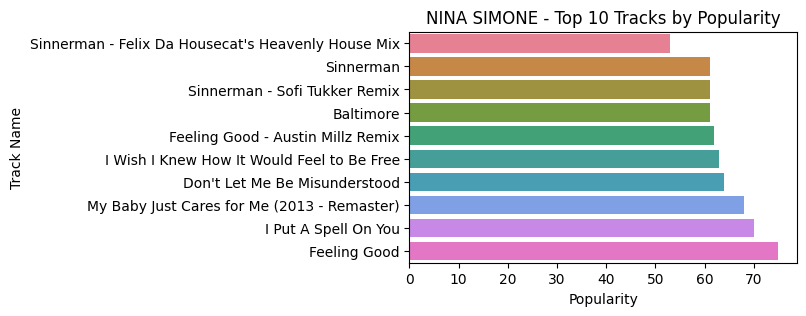

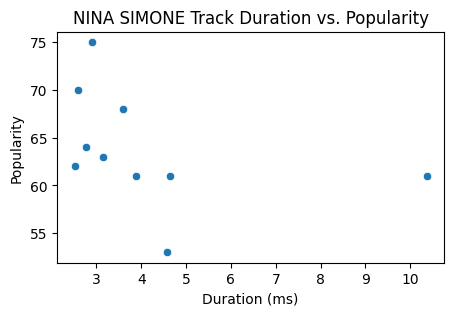

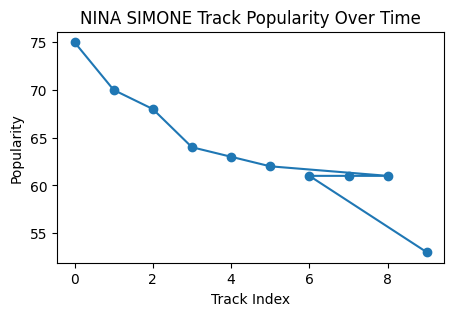

In [9]:
#DATA ANALYSIS 
colors = sns.color_palette('husl', 10)
plt.figure(figsize=(5, 3))
sns.barplot(x='popularity', y='name', data=tracks_df.head(10),palette=colors)
plt.title('NINA SIMONE - Top 10 Tracks by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Track Name')
plt.show()

plt.figure(figsize=(5, 3))
sns.scatterplot(x='duration_ms', y='popularity', data=tracks_df)
plt.title('NINA SIMONE Track Duration vs. Popularity')
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.show()

plt.figure(figsize=(5, 3))
plt.plot(tracks_df.index, tracks_df['popularity'], marker='o', linestyle='-')
plt.title('NINA SIMONE Track Popularity Over Time')
plt.xlabel('Track Index')
plt.ylabel('Popularity')
plt.show()
